<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/R14_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (단일) 회귀분석
- 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법
- 한편, 회귀분석은 ("상관분석" + 예측)하는 통계적 기법
- 수량형 값을 예측하는데 주로 사용되는 통계적 모형
   - 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고
   - 독립변수가 주어지면 종속변수의 값이 얼마인지 추정
   - 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 회귀방정식이라 함

$$\hat{y} = a + bx + \epsilon $$
   
   * a : 절편
   * b : 기울기
   * e : 잔차(오차)

- 회귀직선을 그릴때는 '최소제곱법'이라는 수학적 기법을 이용하는데, 이는 두 변수의 "선형관계"를 계량화 한 것임

- lm(   ~   )

- 회귀분석으로 알수 있는 것
  - 모형적합도 : 모형이 데이터에 얼마나 잘 맞는가?

- 광고비와 매출액의 관계가 데이터에 잘 맞는지 검증할 수 있음
- 회귀계수 : 독립변수의 변화가 종속변수를 얼마나 변화시키는가?
- 광고비가 증가하면 매출액은 얼마나 증가할지 예상할 수 있음

# 회귀분석 사전진단
- 독립변수와 종속변수가 정구분포를 띄는지 확인
- 독립변수와 종속변수간의 선형관계 존재 유무 확인

예) 전화판촉횟수와 판매량의 관계
- 판촉횟수(p)가 증가하면 판매량(s)도 증가하는지 알아보세요

In [23]:
p <- c(96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44 , 84)
s <- c(41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30)

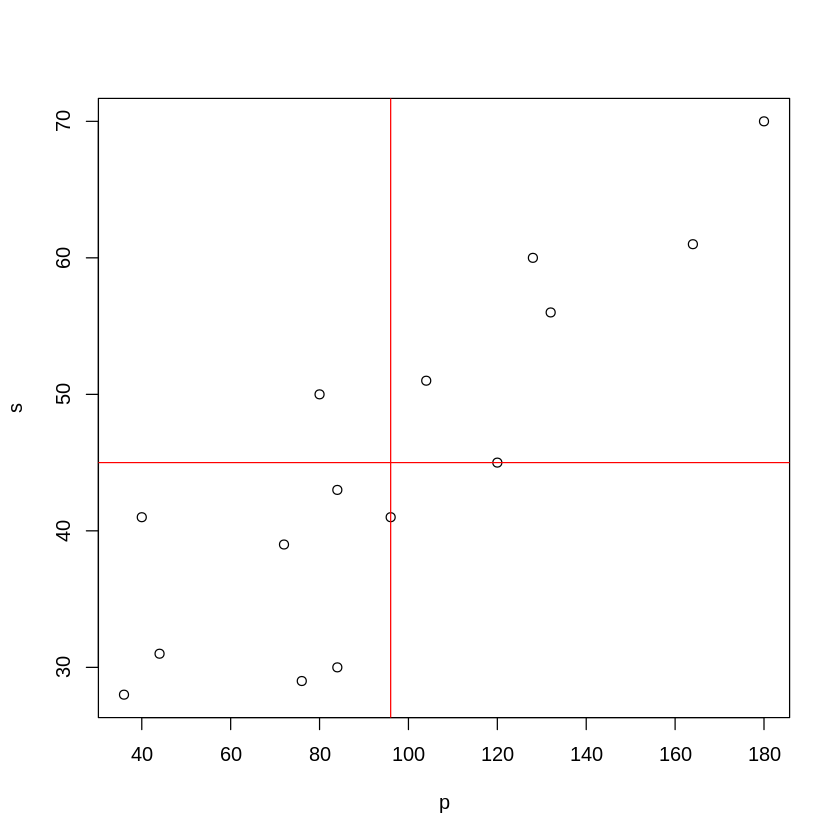

In [24]:
plot(p,s)
abline(v=mean(p),col ='red')
abline(h=mean(s),col ='red')

In [18]:
cor(p,s) # 강한 상관관계가 있음!!

[1] 0.8895383

In [43]:
lm( s ~ p)


Call:
lm(formula = s ~ p)

Coefficients:
(Intercept)            p  
    19.9800       0.2606  


선형방정식을 작성하려면 회귀계수가 필요한데, 이것은 최소제곱법으로 계산할 수 있음
- lm(s ~ p)
- Coefficients : 회귀 계수
- Intercept : 절편(a) : 19.98
- p : 기울기(b) : 0.26

따라서, 선형방정식은 19.98 + 0.26x 임



적성된 방정식의 의미
- 방정식의 x : 판촉전화 횟수
- 19.98 의미 : 판촉전화 횟수 0일때의 제품을 19.98 만큼 팔 수 있다?
  * 판촉전화 횟수는 0일 수 없음 : 예측에는 사용 할 수 없음
- 0.26 의미 : 판촉전화 횟수가 0일때의 제품을 0.26만큼 팔 수 있음
  * 독립변수가 주어졌을 때 종속 변수의 변화량을 파악할 수 있음   

- 선형방정식을 이용해서 판촉전화 84회시 예상 판매량은?


In [25]:
x = 84
19.98 + 0.26 * x

[1] 41.82

- 산점도에서 선형방정식을 이용한 회귀선 시각화

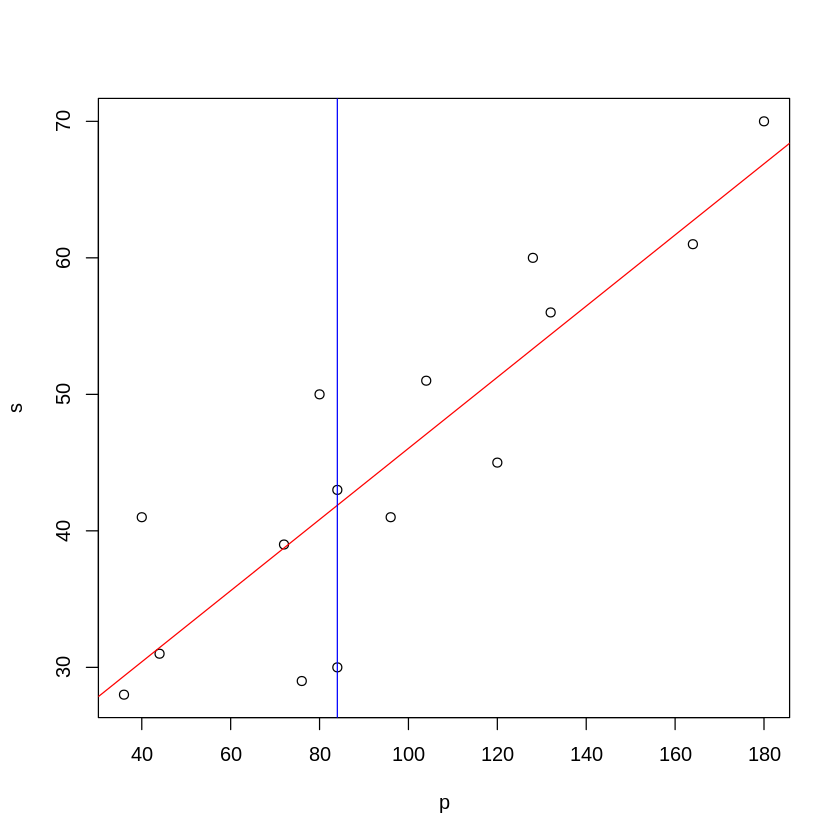

In [26]:
plot(p,s)
abline(lm(s~p), col='red')
abline(v=84, col='blue')

- 전화횟수가 84일때 판매량은 41.87로 예측
  - 하지만, 실제값은 43, 30나오는데, 과연 이 방정식을 믿어도 될까?

- R 에서는 lm함수로 회귀식을 계산한후 summary로 출력하면 분석 결과가 나옴


In [27]:
model <- lm(s ~ p)
summary(model)


Call:
lm(formula = s ~ p)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.873  -2.861   0.255   3.511  10.595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.9800     4.3897   4.552 0.000544 ***
p             0.2606     0.0420   6.205 3.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.72 on 13 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7282 
F-statistic:  38.5 on 1 and 13 DF,  p-value: 3.193e-05


분석결과 이해하기
1. 결정계수 R^2 (0.7282) : 회귀모형이 나름의 의미가 있는지 파악
   - 최소 75%, 보통 85% 이상되어야 함 --> "데이터르 더 모아 분석 필요" or 삭제는?
   - 90% 이상의 모델은 상당히 어렵다... 

2. 회귀계수 유의성(p-value): F 검정을 통해 회귀 계수 유무 파악 
   - p > 0.05 이상으로 회귀계수가 있다고 판단

3. 각 회귀계수 유의성(Pr(>|t|) : t 검정을 통해 회귀 계수
   - *** 의미가 있다는 의미(Signif. codes)


# 실습 : 식이요법
- '1'번 닭을 대상으로 신간 대비 몸무게에 대한 회귀분석  

In [28]:
library(MASS)

In [29]:
str(ChickWeight)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


- weight : 닭 몸무게
- time : 몸무게 측정시 병아리 나이(일수)
- chick : 닭번호
- diet : 닭 모이 종류


In [60]:
w <- ChickWeight[ChickWeight$Chick == 1, 'weight']
t <- ChickWeight[ChickWeight$Chick == 1, 'Time']

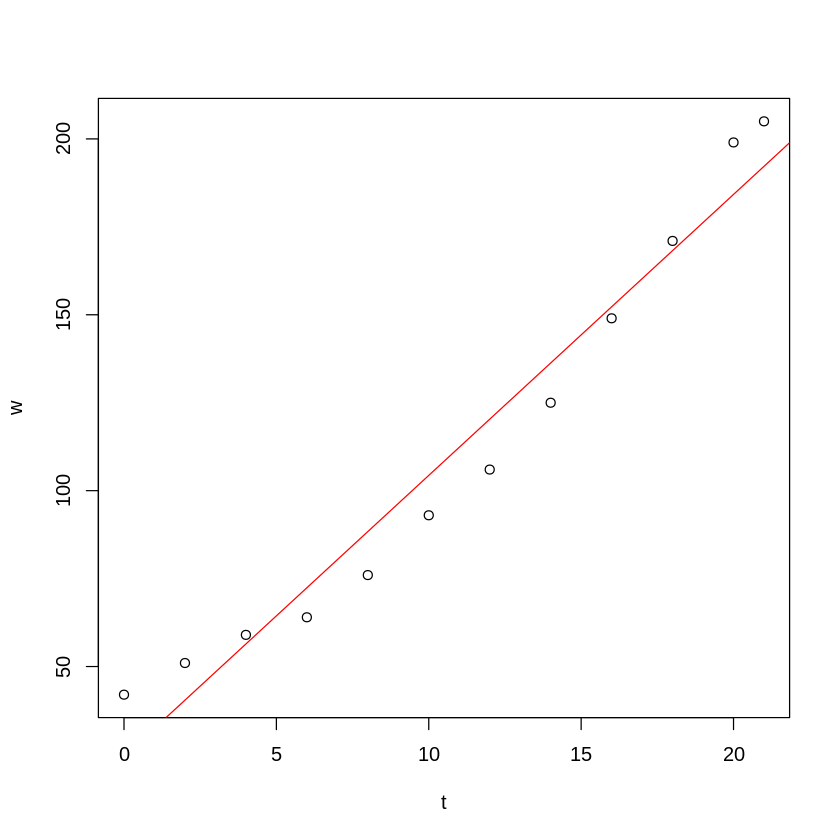

In [61]:
plot(t,w)
abline(lm(w~t), col = 'red') # lm(종속번수 ~ 독립변수)

In [62]:
cor(t,w) # 0.98

[1] 0.9791822

In [63]:
lm(w~t) # y = 24.47 + 7.988 * x


Call:
lm(formula = w ~ t)

Coefficients:
(Intercept)            t  
     24.465        7.988  


# 내가 푼것 (수정)

In [32]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [38]:
c <- ChickWeight %>% filter(Chick == 1) %>% select(Time, weight)
head(c)

,Time,weight
,<dbl>,<dbl>
1,0,42
2,2,51
3,4,59
4,6,64
5,8,76
6,10,93


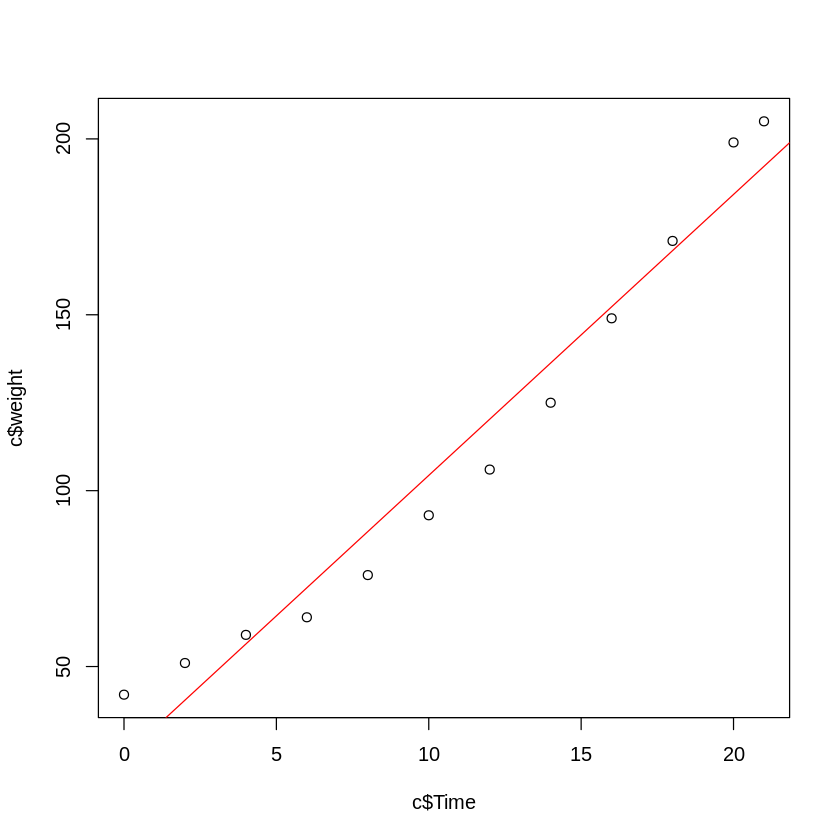

In [57]:
plot(c$Time, c$weight)
abline(lm(c$weight ~ c$Time), col = 'red')

In [58]:
lm(c$weight ~ c$Time )


Call:
lm(formula = c$weight ~ c$Time)

Coefficients:
(Intercept)       c$Time  
     24.465        7.988  


In [59]:
model <- lm(c$weight ~ c$Time)
summary(model)


Call:
lm(formula = c$weight ~ c$Time)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636  0.00456 ** 
c$Time        7.9879     0.5236  15.255 2.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 2.974e-08


분석결과 이해하기
1. 결정계수 R^2 (0.9547) ==> 회귀계수 의미가 있음!!!
2. 회귀계수 유의성(p-value)
   - p < 0.05 로 회귀계수가 있다
3. 각 회귀계수 유의성(Pr(>|t|)
   - *** 의미가 있다는 의미(Signif. codes)
